In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/System-Threat-Forecaster/sample_submission.csv
/kaggle/input/System-Threat-Forecaster/train.csv
/kaggle/input/System-Threat-Forecaster/test.csv


In [2]:
import warnings
warnings.filterwarnings("ignore") 


> The goal of this competition is to predict a system’s probability of getting infected by various families of malware, based on different properties of that system. The telemetry data containing these properties and the system infections was generated by threat reports collected by system's antivirus software.

# Loading training and test datasets

In [3]:
train = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")

In [4]:
test = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")

In [15]:
train.shape

(100000, 76)

In [16]:
test.shape

(10000, 75)

In [17]:
train.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 75 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   MachineID                           10000 non-null  object 
 1   ProductName                         10000 non-null  object 
 2   EngineVersion                       10000 non-null  object 
 3   AppVersion                          10000 non-null  object 
 4   SignatureVersion                    10000 non-null  object 
 5   IsBetaUser                          10000 non-null  int64  
 6   RealTimeProtectionState             9991 non-null   float64
 7   IsPassiveModeEnabled                10000 non-null  int64  
 8   AntivirusConfigID                   9998 non-null   float64
 9   NumAntivirusProductsInstalled       9998 non-null   float64
 10  NumAntivirusProductsEnabled         9998 non-null   float64
 11  HasTpm                              10000 

In [20]:
print(train.dtypes)

MachineID            object
ProductName          object
EngineVersion        object
AppVersion           object
SignatureVersion     object
                     ...   
IsGamer             float64
RegionIdentifier    float64
DateAS               object
DateOS               object
target                int64
Length: 76, dtype: object


# Train dataset is balanced

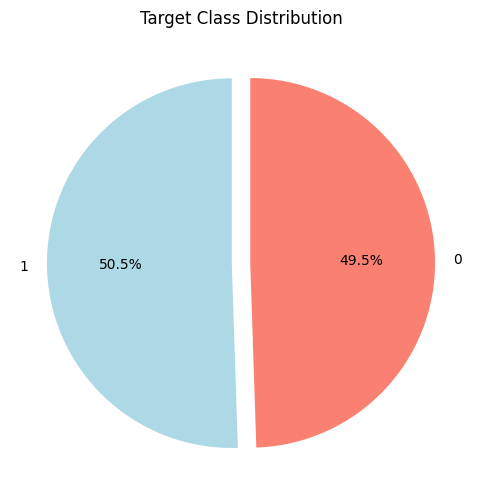

In [109]:
import matplotlib.pyplot as plt
import pandas as pd



class_counts = train['target'].value_counts()
labels = class_counts.index  
sizes = class_counts.values  


plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'salmon'], startangle=90, explode=(0.05, 0.05))
plt.title("Target Class Distribution")
plt.show()


Visualizing malware detection using a pie chart, where:
50.5% (blue section) represents systems with detected malware (Class 1).
49.5% (orange section) represents systems without detected malware (Class 0).

In [22]:
train['target'].value_counts()

target
1    50525
0    49475
Name: count, dtype: int64

# Exploratory Data Analysis

In [23]:
train.shape

(100000, 76)

In [24]:
train.describe()

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,...,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,target
count,100000.0,99934.000000,100000.000000,99924.000000,99924.000000,99924.000000,100000.000000,100000.000000,99377.000000,100000.000000,...,99624.000000,99666.000000,100000.000000,99980.000000,100000.000000,100000.000000,99866.000000,99441.000000,99441.000000,100000.000000
mean,0.0,6.848430,0.017620,47975.710440,1.326528,1.018264,0.996780,108.078790,81029.938587,169.741630,...,401.987613,32942.648044,0.495690,0.003841,0.128470,0.040580,0.058398,0.296668,7.875866,0.505250
std,0.0,1.015166,0.131566,13803.321533,0.520681,0.155291,0.056654,63.062151,48944.027074,89.188929,...,221.318891,21151.970827,0.499984,0.061855,0.334614,0.197316,0.234496,0.456791,4.562533,0.499975
min,0.0,0.000000,0.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.0,7.000000,0.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36694.000000,89.000000,...,142.000000,13020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.0,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,181.000000,...,500.000000,33066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000
75%,0.0,7.000000,0.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,122835.000000,267.000000,...,556.000000,52357.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000
max,0.0,8.000000,1.000000,70490.000000,5.000000,4.000000,1.000000,222.000000,167957.000000,296.000000,...,1083.000000,72091.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000


In [25]:
train.columns

Index(['MachineID', 'ProductName', 'EngineVersion', 'AppVersion',
       'SignatureVersion', 'IsBetaUser', 'RealTimeProtectionState',
       'IsPassiveModeEnabled', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID',
       'PlatformType', 'Processor', 'OSVersion', 'OSBuildNumber',
       'OSProductSuite', 'OsPlatformSubRelease', 'OSBuildLab',
       'SKUEditionName', 'IsSystemProtected', 'AutoSampleSubmissionEnabled',
       'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA',
       'MDC2FormFactor', 'DeviceFamily', 'OEMNameID', 'OEMModelID',
       'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID',
       'PrimaryDiskCapacityMB', 'PrimaryDiskType', 'SystemVolumeCapacityMB',
       'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'ChassisType',
       'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutio

In [86]:
pd.set_option("display.max_rows", None)

In [27]:
categorical_cols = []
numerical_cols = []


for col in train.columns:
    unique_values = train[col].unique()
    
    if train[col].dtype == 'object':  
        categorical_cols.append(col)
        print(f"Categorical Column: {col}")
        print("Unique Values:", unique_values)
        print("-" * 40)
    else:  
        numerical_cols.append(col)
        print(f"Numerical Column: {col}")
        print("Unique Values:", unique_values)
        print("-" * 40)

Categorical Column: MachineID
Unique Values: ['f541bae429089117c4aac39c90dd3416' 'dc2b14d9ce3a0ce4050bb640190f2ca5'
 'fd20c5f010e9c5f91ad1c6b3e0da68a0' ... 'd6852dfff534e03d5ddfd3c7875ab072'
 '70a8dc682128c9ff78a3de5aea9dac74' 'ad9c385b53f2ca788933a39603b84eda']
----------------------------------------
Categorical Column: ProductName
Unique Values: ['win8defender' 'mse']
----------------------------------------
Categorical Column: EngineVersion
Unique Values: ['1.1.15200.1' '1.1.15100.1' '1.1.15000.2' '1.1.14800.3' '1.1.14901.4'
 '1.1.15300.6' '1.1.14700.5' '1.1.13504.0' '1.1.14104.0' '1.1.14306.0'
 '1.1.15300.5' '1.1.14600.4' '1.1.13701.0' '1.1.15000.1' '1.1.13202.0'
 '1.1.13303.0' '1.1.14500.5' '1.1.13601.0' '1.1.13704.0' '1.1.13407.0'
 '1.1.14003.0' '1.1.14202.0' '1.1.14405.2' '1.1.13000.0' '1.1.13804.0'
 '1.1.14500.2' '1.1.14800.1' '1.1.14305.0' '1.1.14901.3' '1.1.13103.0'
 '1.1.13903.0' '1.1.12805.0' '1.1.14700.4' '1.1.12902.0' '1.1.14700.3'
 '1.1.13802.0' '1.1.13803.0']
---------

In [28]:
print("Number of categorical columns:", len(categorical_cols))
print("Number of numerical columns:", len(numerical_cols))

Number of categorical columns: 28
Number of numerical columns: 48


# Redundant Columns

Redundant columns in a dataset are those that do not contribute meaningful information for analysis or modeling

In [29]:
unique_counts = train.nunique().sort_values(ascending=False)
print(unique_counts)


MachineID                             99835
SystemVolumeCapacityMB                46188
CityID                                16047
OEMModelID                            15952
FirmwareVersionID                     12299
SignatureVersion                       2735
DateAS                                 2695
AntivirusConfigID                      1976
InternalBatteryNumberOfCharges         1760
ProcessorModelID                       1659
OEMNameID                               837
PrimaryDiskCapacityMB                   398
PrimaryDisplayDiagonalInches            362
OSBuildLab                              281
GeoRegionID                             239
NumericOSVersion                        221
CountryID                               220
OSBuildRevisionOnly                     199
LocaleEnglishNameID                     185
FirmwareManufacturerID                  169
PrimaryDisplayResolutionVertical        131
TotalPhysicalRAMMB                      127
PrimaryDisplayResolutionHorizont

In [30]:
constant_features = [col for col in train.columns if train[col].nunique() == 1]
print("Constant features:", constant_features)


Constant features: ['IsBetaUser', 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled']


In [31]:
print(train[['IsBetaUser', 'AutoSampleSubmissionEnabled','IsFlightsDisabled']].head(10))  


   IsBetaUser  AutoSampleSubmissionEnabled  IsFlightsDisabled
0           0                            0                0.0
1           0                            0                0.0
2           0                            0                0.0
3           0                            0                0.0
4           0                            0                0.0
5           0                            0                0.0
6           0                            0                0.0
7           0                            0                0.0
8           0                            0                0.0
9           0                            0                0.0


In [32]:
print(train[['OSEdition' , 'OSSkuFriendlyName']].head(10))



            OSEdition    OSSkuFriendlyName
0                Core                 CORE
1        Professional         PROFESSIONAL
2                Core                 CORE
3                Core                 CORE
4        Professional         PROFESSIONAL
5        Professional         PROFESSIONAL
6        Professional         PROFESSIONAL
7        Professional         PROFESSIONAL
8        Professional         PROFESSIONAL
9  CoreSingleLanguage  CORE_SINGLELANGUAGE


In [33]:
train.isnull().sum().sort_values(ascending=False)

SMode                                 981
CityID                                623
RegionIdentifier                      559
IsGamer                               559
InternalBatteryNumberOfCharges        515
FirmwareManufacturerID                376
FirmwareVersionID                     334
IsFlightsDisabled                     326
OEMModelID                            228
OEMNameID                             212
FirewallEnabled                       166
TotalPhysicalRAMMB                    151
IsAlwaysOnAlwaysConnectedCapable      134
OSInstallLanguageID                   113
PrimaryDiskCapacityMB                 110
SystemVolumeCapacityMB                110
IEVersionID                           107
ProcessorManufacturerID                85
ProcessorModelID                       85
ProcessorCoreCount                     85
IsSystemProtected                      76
NumAntivirusProductsEnabled            76
NumAntivirusProductsInstalled          76
AntivirusConfigID                 

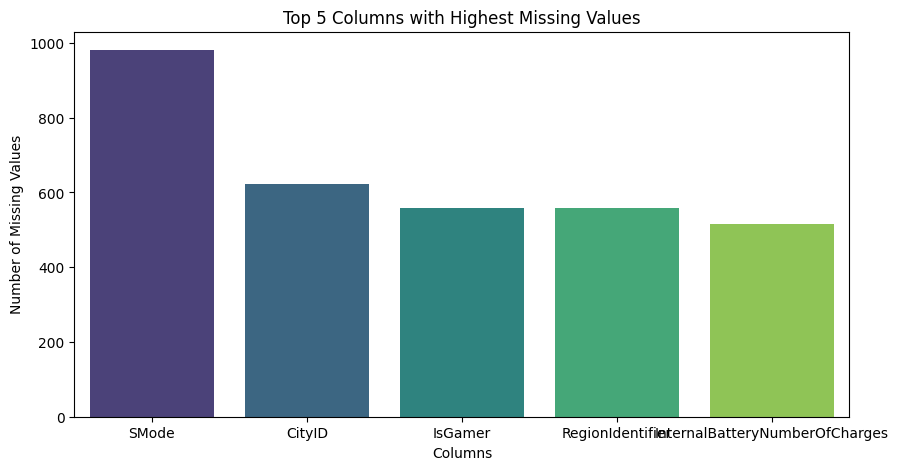

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
null_counts = train_copy.isnull().sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 5))
sns.barplot(x=null_counts.index, y=null_counts.values, palette="viridis")


plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Top 5 Columns with Highest Missing Values")

plt.show()

# Summary based on observations:

1. Some columns contain NaN values:


* RealTimeProtectionState
* NumAntivirusProductsInstalled
* NumAntivirusProductsEnabled
* IsSystemProtected
* SMode
* FirewallEnabled
* EnableLUA

2. Duplicate columns with different letter cases:

* OSEdition and OSSkuFriendlyName represent the same information (one in lowercase, one in uppercase).

3.  Columns with only one unique value (0):

* IsBetaUser

* AutoSampleSubmissionEnabled

* IsFlightsDisabled

4. High Cardinality Features
   * MachineID
     
   

In [5]:
train_copy=train.copy()

In [6]:
train_copy.drop(columns=['IsBetaUser', 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled', 'MachineID', 'OSSkuFriendlyName'], inplace=True)


In [7]:
train_copy.shape

(100000, 71)

In [8]:
test_copy=test.copy()

In [9]:
test_copy.drop(columns=['IsBetaUser', 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled', 'MachineID', 'OSSkuFriendlyName'], inplace=True)


In [10]:
test_copy.shape

(10000, 70)

# Class Distribution of Binary Columns

In [43]:
binary_columns = [col for col in train_copy.columns if train_copy[col].nunique() == 2]

print("Binary columns:", binary_columns)


Binary columns: ['ProductName', 'IsPassiveModeEnabled', 'HasTpm', 'IsSystemProtected', 'SMode', 'FirewallEnabled', 'DeviceFamily', 'HasOpticalDiskDrive', 'IsPortableOS', 'IsSecureBootEnabled', 'IsVirtualDevice', 'IsTouchEnabled', 'IsPenCapable', 'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer', 'target']


16 binary columns

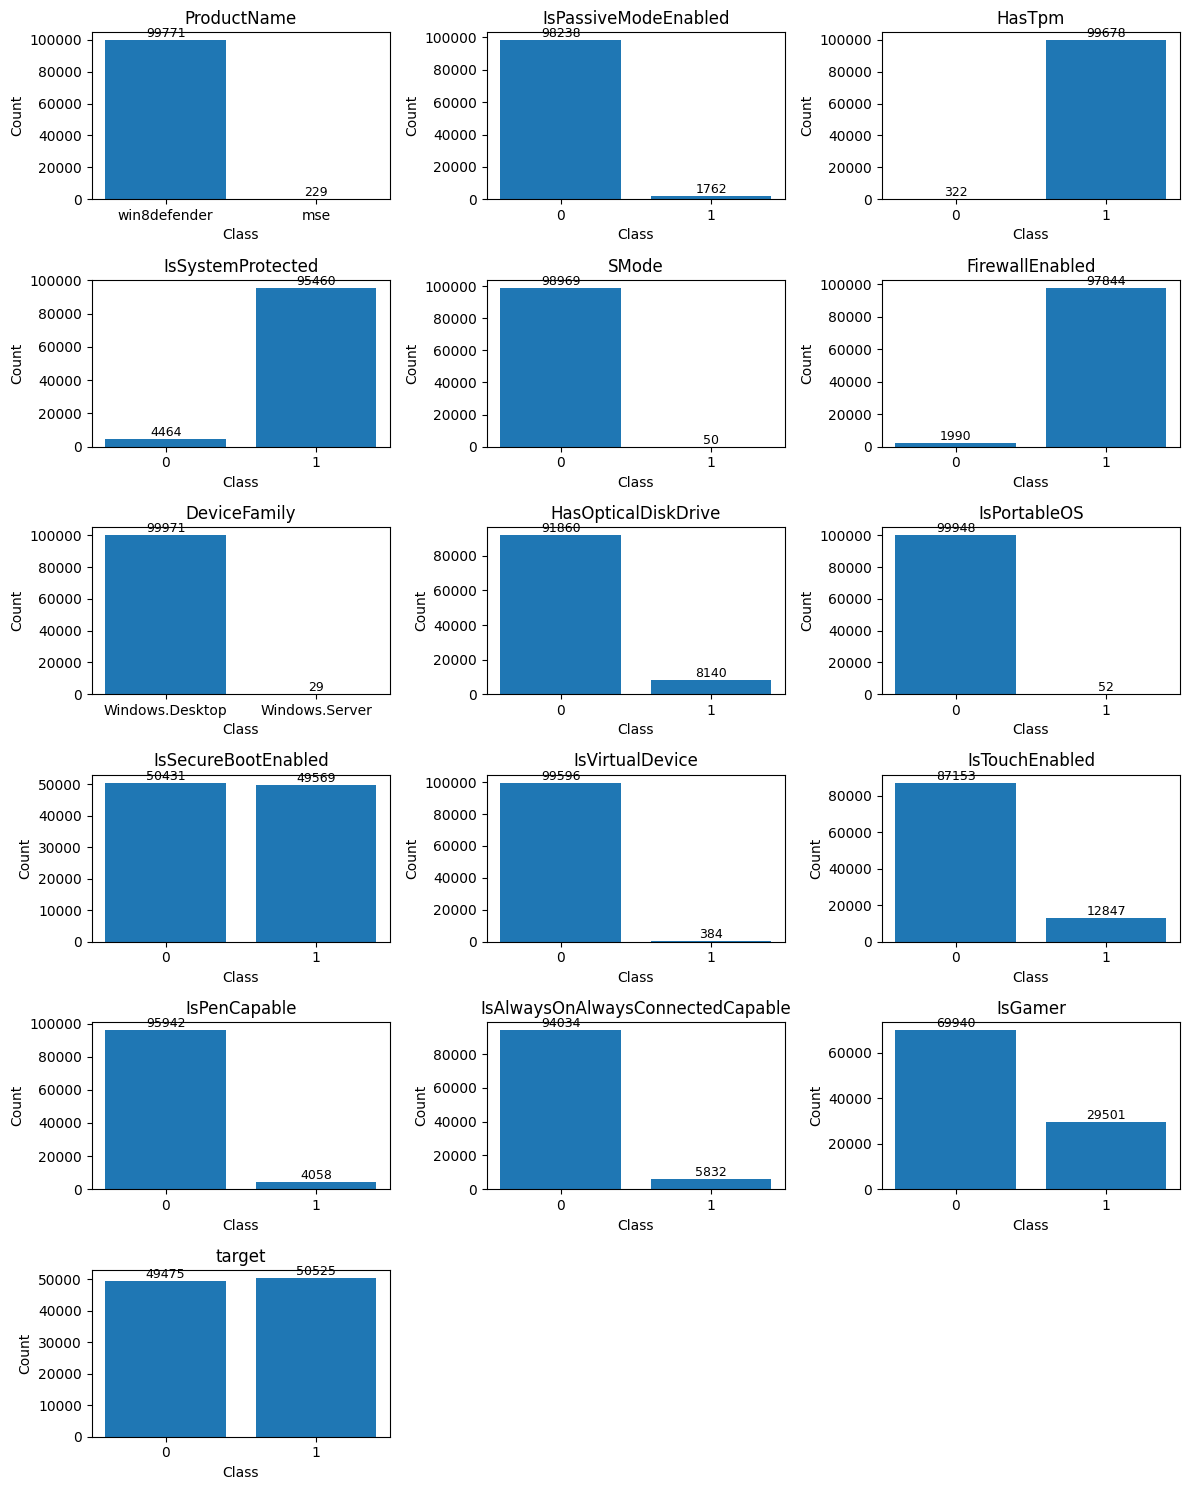

In [44]:

n_cols = 3  
n_rows = -(-len(binary_columns) // n_cols)  


max_width = 15   
max_height = 15 

fig_width = min(n_cols * 4, max_width)  
fig_height = min(n_rows * 3, max_height)  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))  
axes = axes.flatten() 

for i, col in enumerate(binary_columns):
    counts = train_copy[col].value_counts()
    bars = axes[i].bar(counts.index, counts.values)  
    axes[i].set_title(col)
    axes[i].set_xticks([0, 1])  
    axes[i].set_xlabel("Class")
    axes[i].set_ylabel("Count")

   
    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2, height, f"{int(height)}",
                       ha='center', va='bottom', fontsize=9)

for i in range(len(binary_columns), len(axes)):
    fig.delaxes(axes[i])  

plt.tight_layout()  

plt.show()

# Distribution Of Numerical Columns

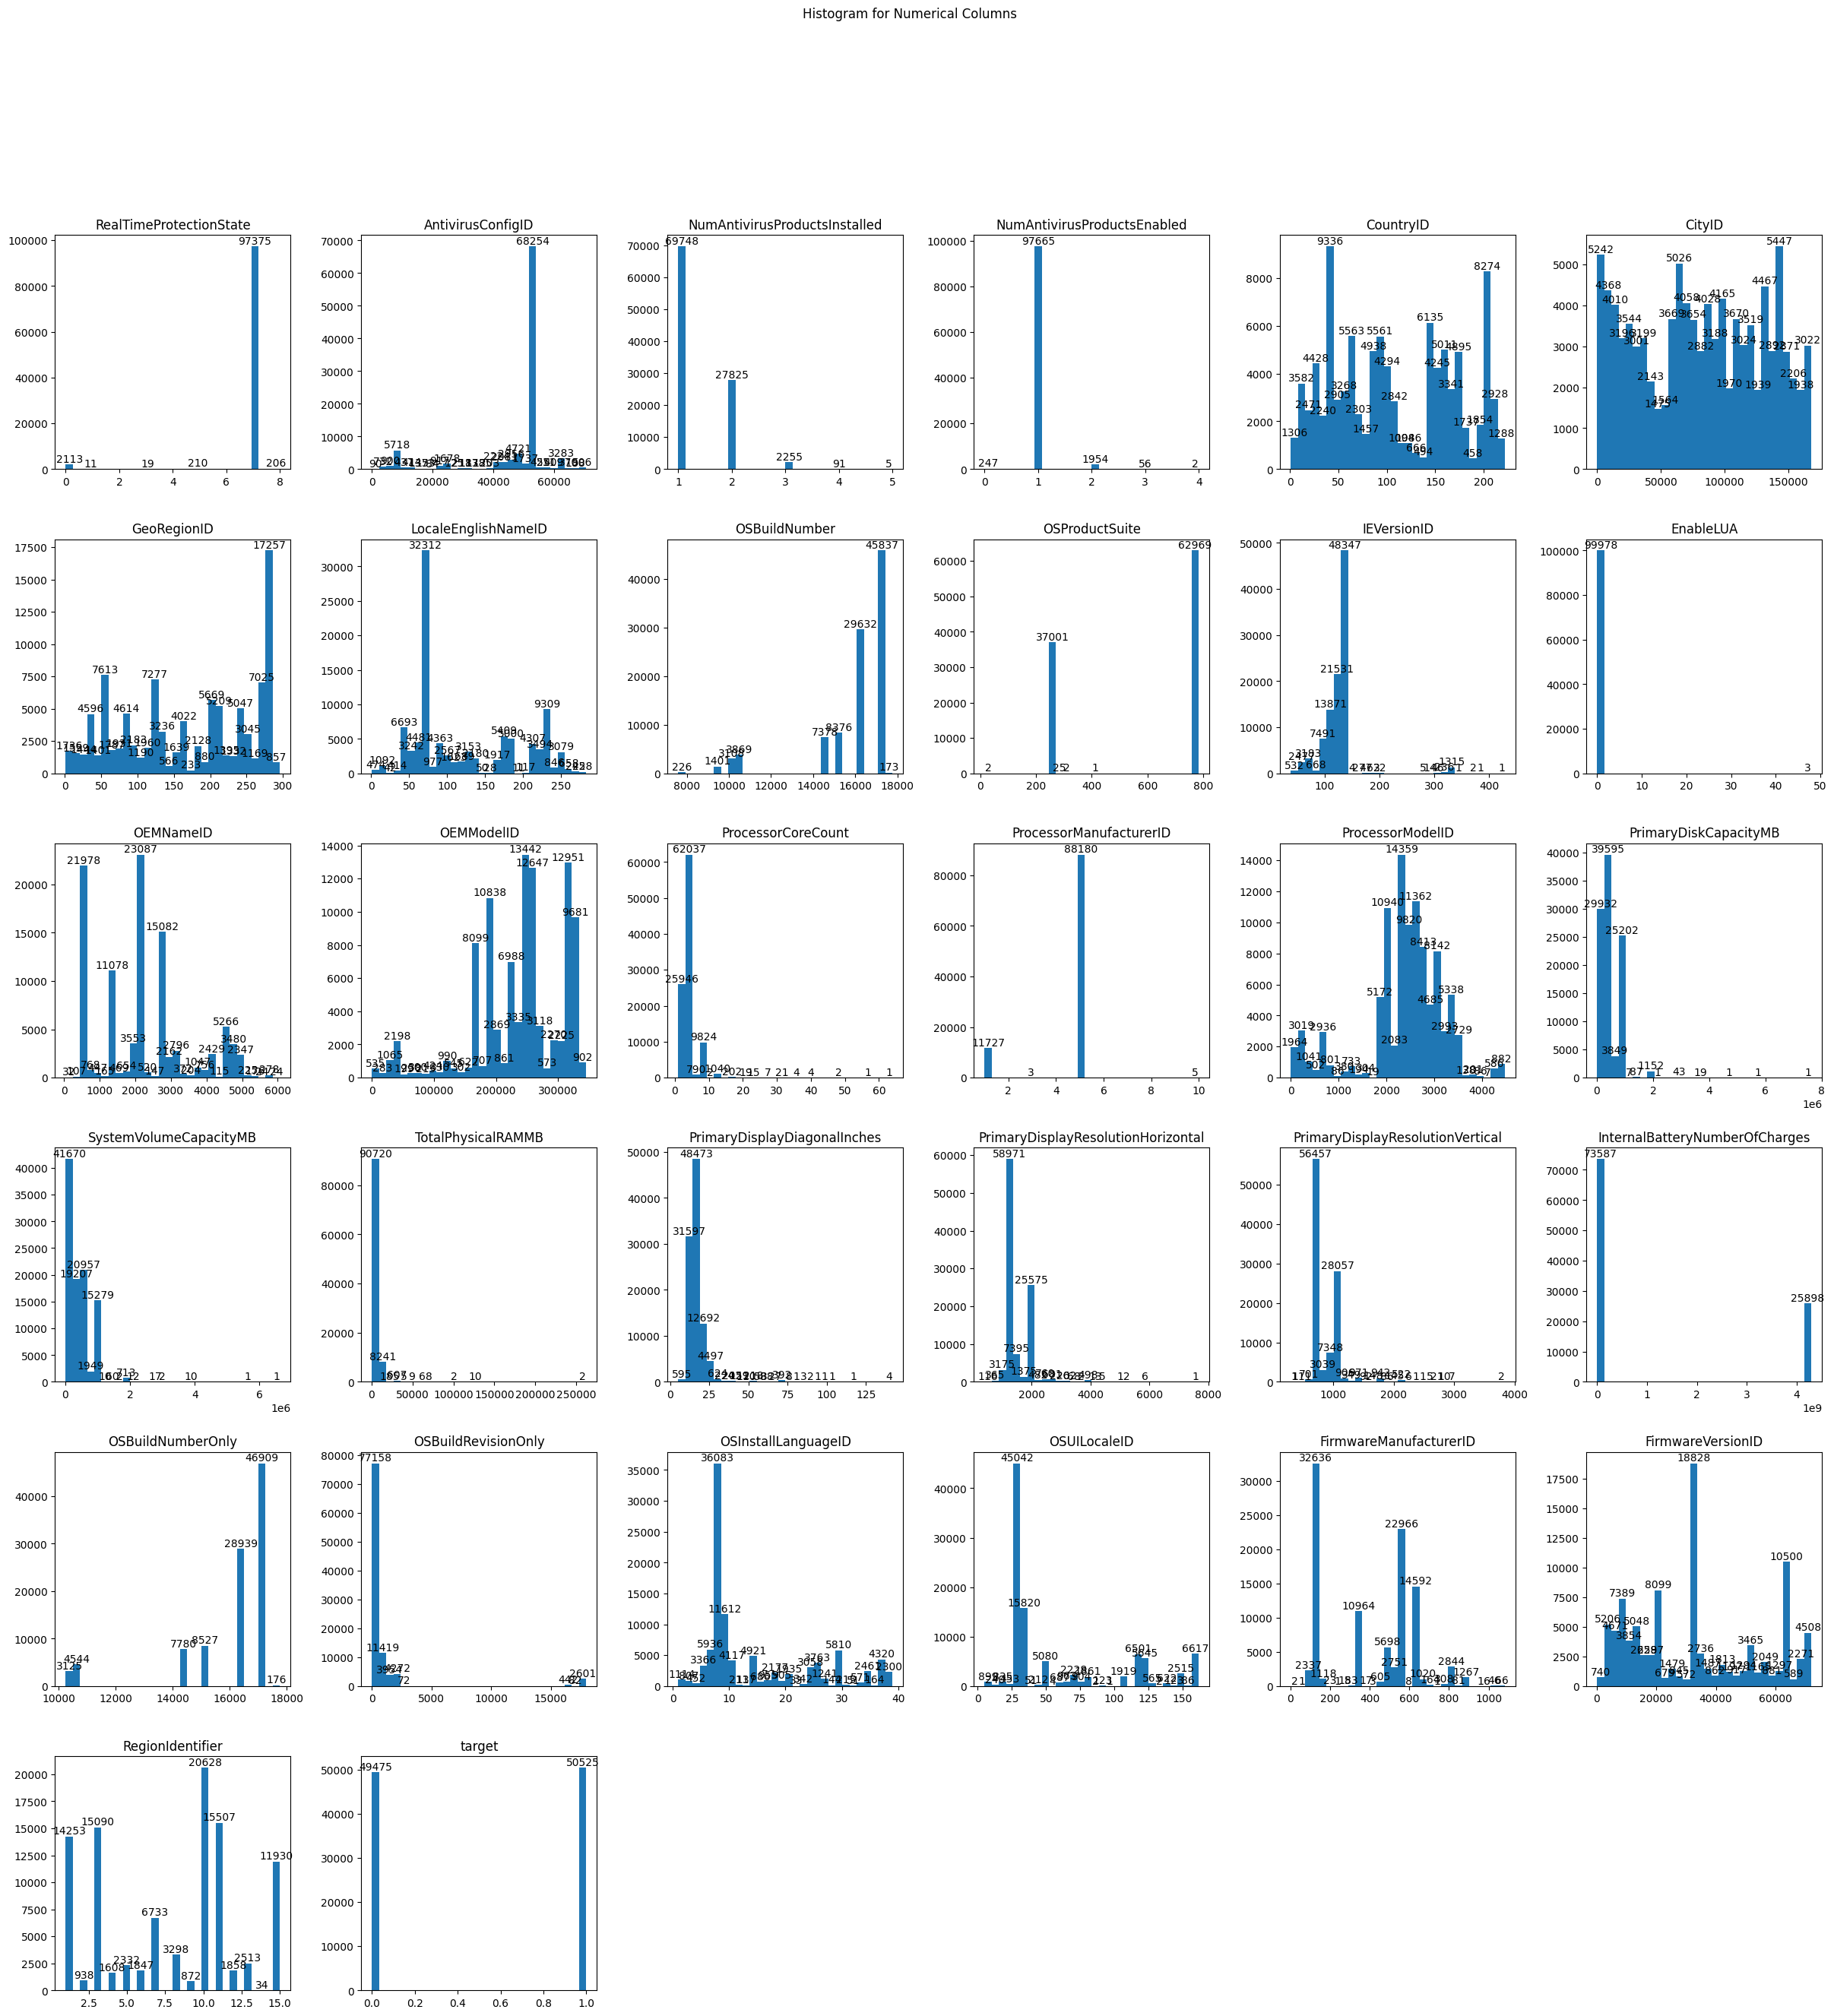

In [45]:

numerical_cols = train_copy.select_dtypes(include=['int64', 'float64']).columns

ax = train_copy[numerical_cols].drop(columns=[ 
    'IsPassiveModeEnabled', 'HasTpm', 'IsSystemProtected', 'SMode', 'FirewallEnabled', 
    'HasOpticalDiskDrive', 'IsPortableOS', 'IsSecureBootEnabled', 'IsVirtualDevice', 
    'IsTouchEnabled', 'IsPenCapable', 'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer'
]).hist(figsize=(30, 30), bins=30, grid=False)

plt.suptitle('Histogram for Numerical Columns')


for row in ax:
    for subplot in row:
        for patch in subplot.patches:
            height = patch.get_height()
            if height > 0:  
                subplot.text(patch.get_x() + patch.get_width() / 2, height, 
                             f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.show()

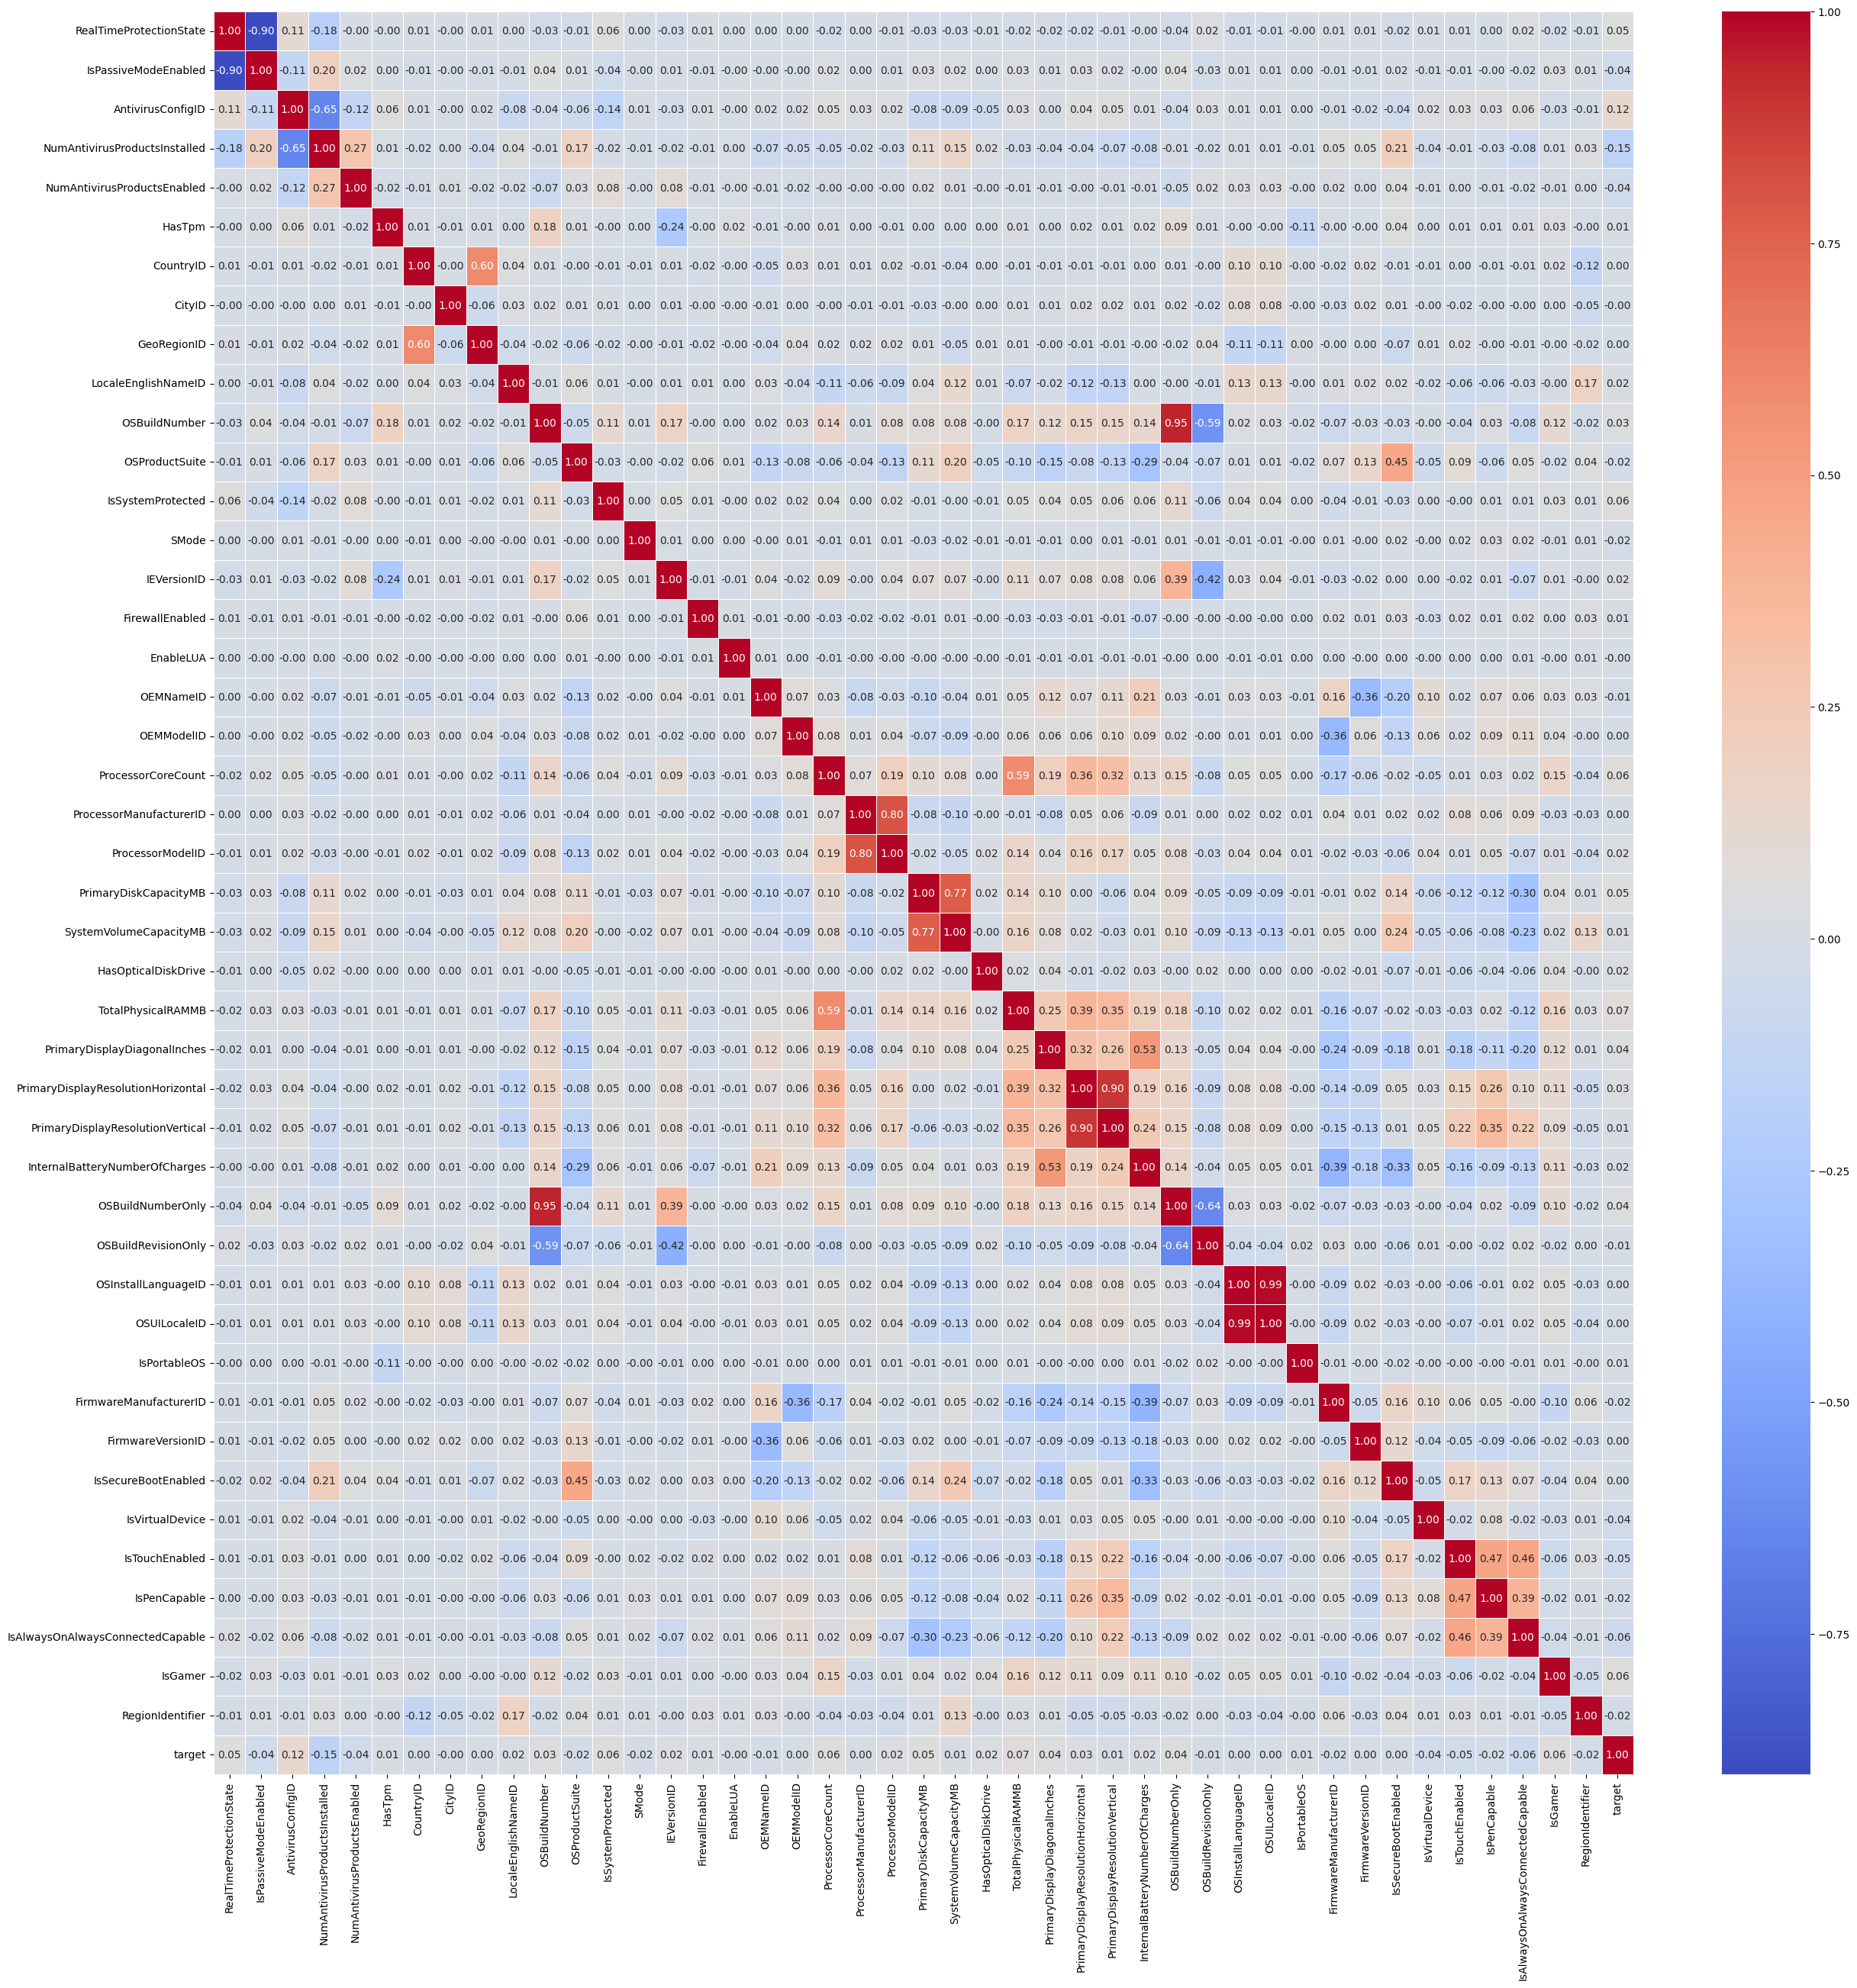

In [46]:
correlation_matrix = train_copy[numerical_cols].corr()
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f",linewidths=0.5)
plt.show()

In [47]:

correlation_matrix = train_copy.corr(numeric_only=True)

threshold = 0.89  

num = 0
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1,len(correlation_matrix.columns)): 
        if abs(correlation_matrix.iloc[i,j])>threshold:
            num = num+1
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            print(f"For the columns {col1} and {col2} has the correlation {correlation_matrix.iloc[i,j]}")
            print("\n")

For the columns RealTimeProtectionState and IsPassiveModeEnabled has the correlation -0.9014263817384273


For the columns OSBuildNumber and OSBuildNumberOnly has the correlation 0.9475643117921996


For the columns PrimaryDisplayResolutionHorizontal and PrimaryDisplayResolutionVertical has the correlation 0.8981739446126249


For the columns OSInstallLanguageID and OSUILocaleID has the correlation 0.9880823538835146




In [48]:
train_copy[['RealTimeProtectionState', 'IsPassiveModeEnabled']].apply(pd.unique)


RealTimeProtectionState    [7.0, 0.0, 8.0, nan, 5.0, 3.0, 1.0]
IsPassiveModeEnabled                                    [0, 1]
dtype: object

In [49]:
for col in ['OSBuildNumber', 'OSBuildNumberOnly']:
    print(f"Unique values in {col}: {train_copy[col].unique()}")


Unique values in OSBuildNumber: [14393 17134 15063 16299 10586  9600 10240 17744  7601 17692 17713 17763
 17746 17738 17758 17754 17760 17741 17751 17755 17735 17730 17672 17686]
Unique values in OSBuildNumberOnly: [14393 17134 15063 16299 10586 10240 17744 17692 17760 17763 17746 17758
 17723 17738 17754 17751 17741 17755 17735 17672 15060 17133 17686]


In [50]:
for col in ['OSInstallLanguageID', 'OSUILocaleID']:
    print(f"Unique values in {col}: {train_copy[col].unique()}")


Unique values in OSInstallLanguageID: [ 5.  9.  7. 37.  8. 20.  4.  6. 10. 30. 24. 35. 33. 27. 17. 26. 29. 39.
 12. 14. 25. 28. 19. 21. 18.  1. 23. 15. nan 36.  2. 16.  3. 31. 13. 34.
 32. 11. 22. 38.]
Unique values in OSUILocaleID: [ 26  34  30 158  31  83  24  28  35 128 109 148 140 120  64 119 125 160
  44  49 115  68 123  74  90  72   5 105  58 151  11  62  20 130  48  87
 156 145  17  12 136  38  92 159  42 121  15  29 146  75  32 162  99   7
  54   8  36 126   6  37 161  59  46 131]


In [11]:
train_copy.drop(columns=['OSBuildNumberOnly'], inplace=True)

In [12]:
test_copy.drop(columns=['OSBuildNumberOnly'], inplace=True)

In [13]:
train_copy.shape

(100000, 70)

In [14]:
test_copy.shape

(10000, 69)

# Class Distribution Of Categorical Columns

In [55]:

categorical_cols = train_copy.select_dtypes(include=['object', 'category']).columns


low_cardinality_cols = [col for col in categorical_cols if train_copy[col].nunique() <= 15]

print("Categorical columns with ≤ 15 unique values:", low_cardinality_cols)


Categorical columns with ≤ 15 unique values: ['ProductName', 'PlatformType', 'Processor', 'OSVersion', 'OsPlatformSubRelease', 'SKUEditionName', 'MDC2FormFactor', 'DeviceFamily', 'PrimaryDiskType', 'PowerPlatformRole', 'OSArchitecture', 'OSBranch', 'OSInstallType', 'AutoUpdateOptionsName', 'OSGenuineState', 'LicenseActivationChannel', 'FlightRing']


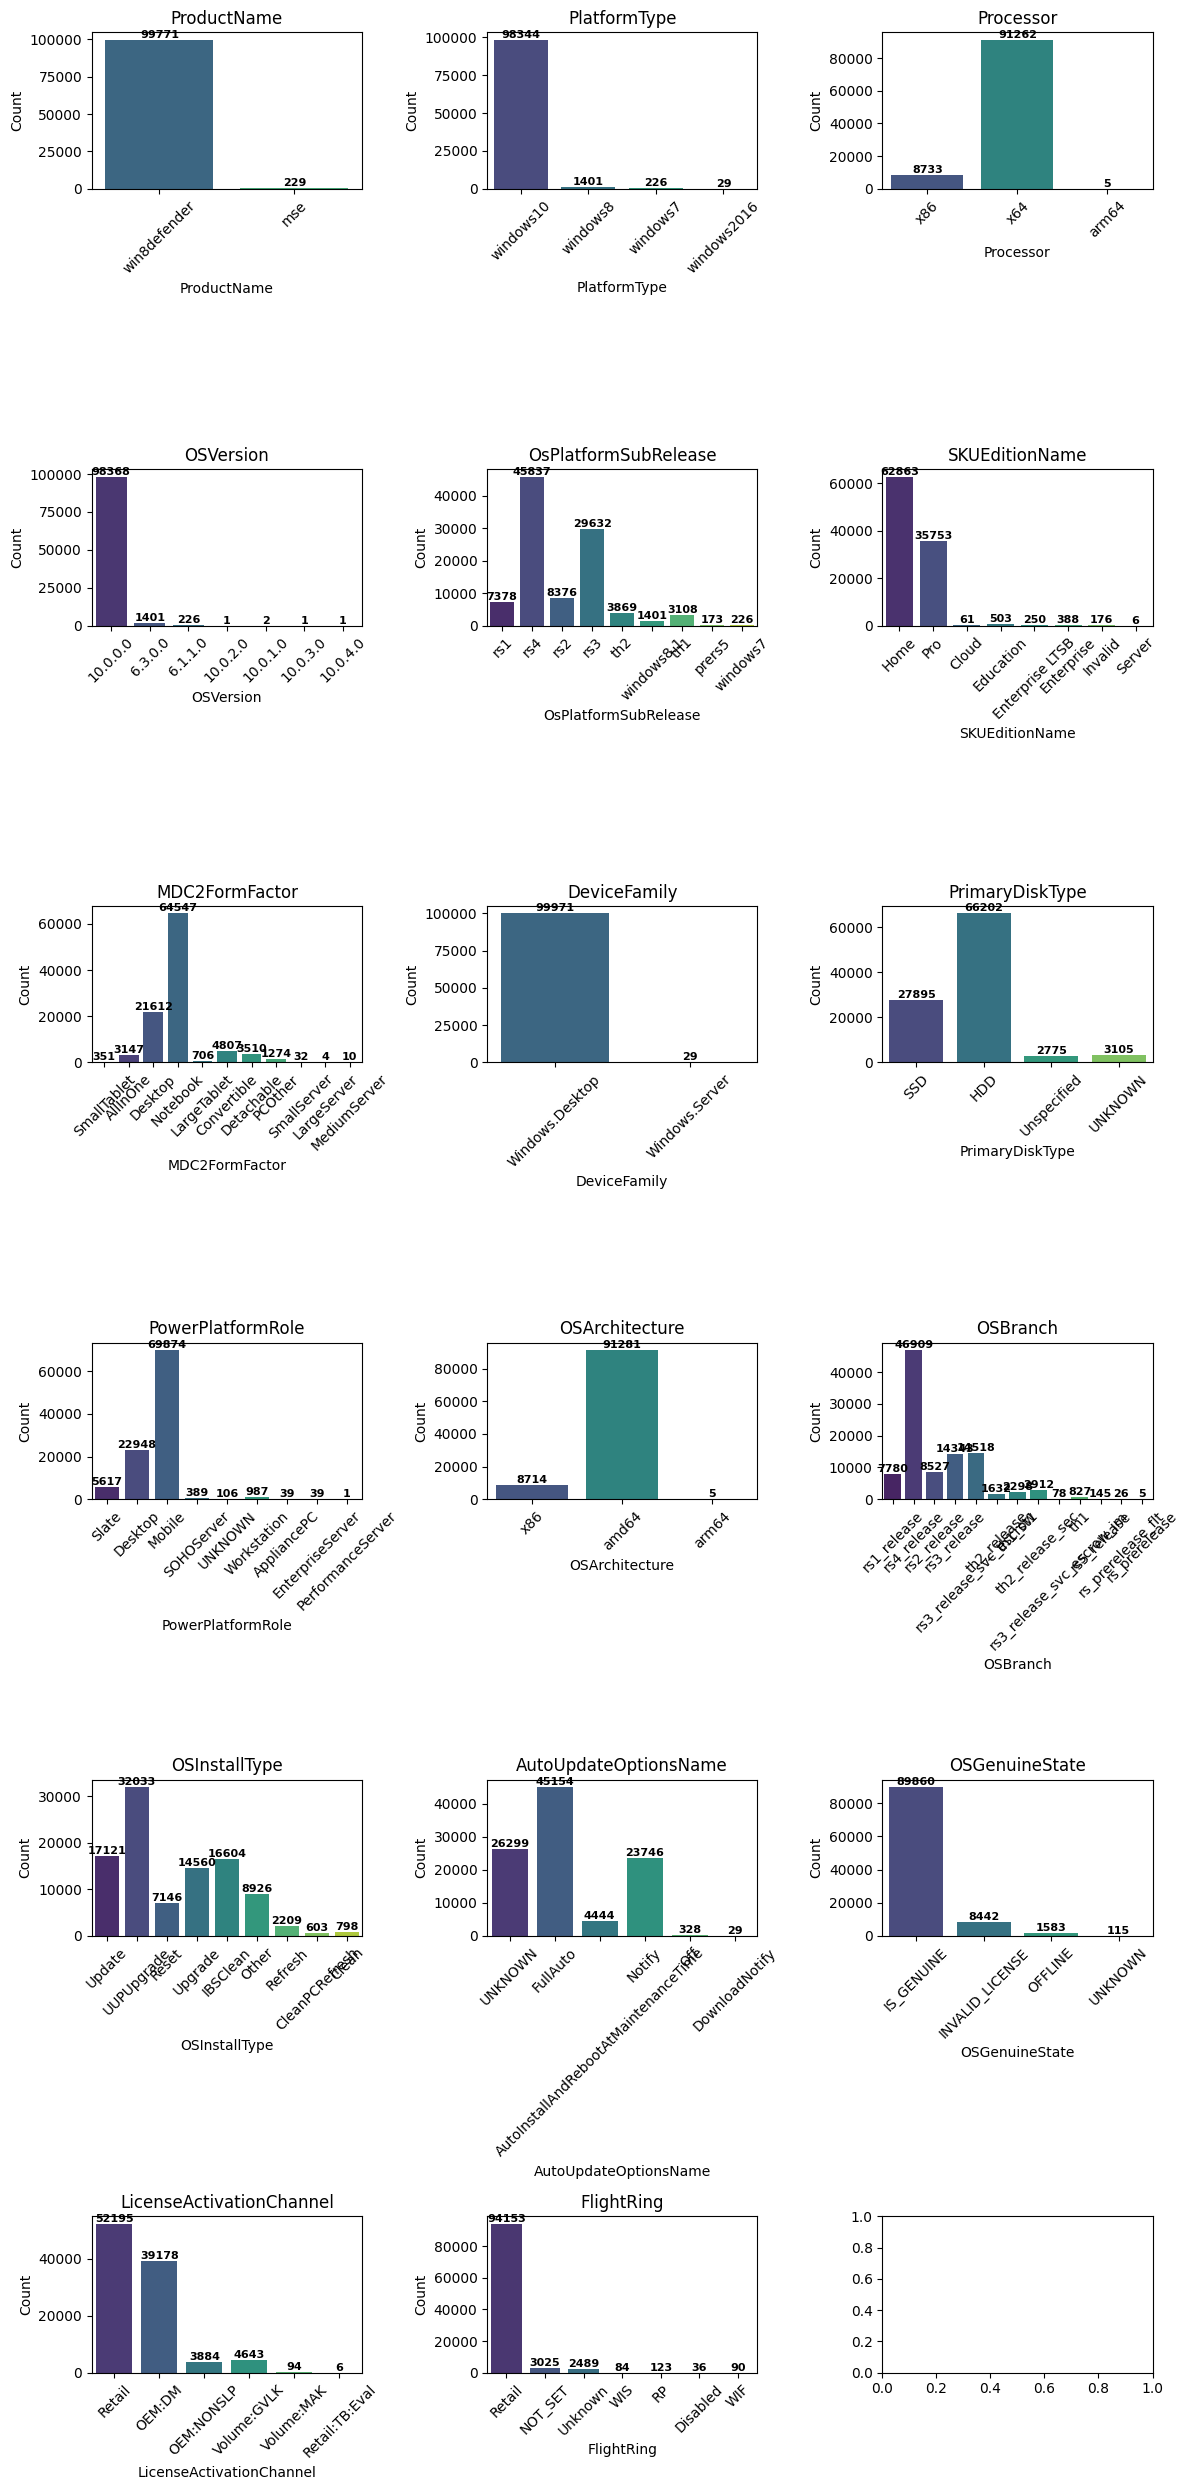

In [57]:

n_cols = 3 
n_rows = -(-len(low_cardinality_cols) // n_cols)  


max_width = 25   
max_height = 25  

fig_width = min(n_cols * 4, max_width)  
fig_height = min(n_rows * 5, max_height)  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))  
axes = axes.flatten()  

for i, col in enumerate(low_cardinality_cols):
    ax = axes[i]
    sns.countplot(x=train_copy[col], palette="viridis", ax=ax)
    ax.set_title(f"{col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)  

    
    for p in ax.patches:
        height = p.get_height()
        if height > 0: 
            ax.text(p.get_x() + p.get_width() / 2, height, f'{int(height)}', 
                    ha='center', va='bottom', fontsize=8, color='black', fontweight='bold')

plt.tight_layout()
plt.show()

In [58]:

unknown_counts = train_copy.apply(lambda col: col.astype(str).str.lower().eq('unknown').sum())


unknown_counts = unknown_counts[unknown_counts > 0].sort_values(ascending=False)


unknown_counts_df = unknown_counts.reset_index()
unknown_counts_df.columns = ['Column Name', 'Unknown Count']


print(unknown_counts_df)

             Column Name  Unknown Count
0  AutoUpdateOptionsName          26299
1        PrimaryDiskType           3105
2             FlightRing           2489
3            ChassisType            513
4         OSGenuineState            115
5      PowerPlatformRole            106


In [59]:

# least_unknown_cols = unknown_counts.nsmallest(3).index


# train_copy[least_unknown_cols] = train_copy[least_unknown_cols].apply(
#     lambda col: col.astype(str).str.lower().replace('unknown', np.nan)
# )


# print(train_copy[least_unknown_cols].head())

# Feature Engineering

In [106]:
# def handle_dateAS(train_copy):
#     print(f"Shape of data before DateAS conversion {train_copy.shape}")
#     train_copy['DateAS'] = pd.to_datetime(train_copy['DateAS'], errors='coerce')
#     train_copy['DateASYear'] = train_copy['DateAS'].dt.year
#     train_copy['DateASMonth'] = train_copy['DateAS'].dt.month
#     train_copy['DateASDay'] = train_copy['DateAS'].dt.day
#     train_copy.drop('DateAS', axis=1, inplace=True)
#     print(f"Shape of data after DateAS conversion {train_copy.shape}")
#     return train_copy

# def handle_dateOS(train_copy):
#     print(f"Shape of data before DateOS conversion {train_copy.shape}")
#     train_copy['DateOS'] = pd.to_datetime(train_copy['DateOS'], errors='coerce')
#     train_copy['DateOSYear'] = train_copy['DateOS'].dt.year
#     train_copy['DateOSMonth'] = train_copy['DateOS'].dt.month
#     train_copy['DateOSDay'] = train_copy['DateOS'].dt.day
#     train_copy.drop('DateOS', axis=1, inplace=True)
# #     print(f"Shape of data after DateOS conversion {train_copy.shape}")
#     return train_copy

# def handle_dateAS_and_dateOS(train_copy):
#     print(f"Shape of data before DateAS and DateOS conversion {train_copy.shape}")
#     train_copy['DateAS'] = pd.to_datetime(train_copy['DateAS'], errors='coerce')
#     train_copy['DateOS'] = pd.to_datetime(train_copy['DateOS'], errors='coerce')
    
#     # Current date
#     current_date = pd.to_datetime('2025-03-24')
    
#     # Time difference features
#     train_copy['days_since_last_malware_signature'] = (current_date - train_copy['DateAS']).dt.days
#     train_copy['days_since_last_os_update'] = (current_date - train_copy['DateOS']).dt.days
#     train_copy['update_gap'] = (train_copy['DateAS'] - train_copy['DateOS']).dt.days  # Lag between OS & malware signature updates
    
    # train_copy.drop(['DateAS', 'DateOS'], axis=1, inplace=True)
    
    # print(f"Shape of data after DateAS and DateOS conversion {train_copy.shape}")
    # return train_copy


In [61]:
# Function to find columns with outliers and its total percentage
def outliers_summary(train_copy):
    outlier_columns = {}  
    total_outliers = 0
    total_values = train_copy.size 

    for col in train_copy.select_dtypes(include=[np.number]).columns:  
        Q1 = train_copy[col].quantile(0.25)  # 25th percentile
        Q3 = train_copy[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

   
        outlier_count = train_copy[(train_copy[col] < lower_bound) | (train_copy[col] > upper_bound)].shape[0]

        if outlier_count > 0:  
            outlier_columns[col] = outlier_count
            total_outliers += outlier_count


    outlier_percentage = (total_outliers / total_values) * 100

    return outlier_columns, total_outliers, round(outlier_percentage, 2)


outlier_columns, total_outliers, overall_outlier_percentage = outliers_summary(train_copy)


print("\n🔹 Columns with Outliers:")
for col, count in outlier_columns.items():
    print(f"   {col}: {count} outliers")

print(f"\n🔹 Total Outliers in Dataset: {total_outliers}")
print(f"🔹 Overall Outlier Percentage: {overall_outlier_percentage}%")


🔹 Columns with Outliers:
   RealTimeProtectionState: 2559 outliers
   IsPassiveModeEnabled: 1762 outliers
   AntivirusConfigID: 19581 outliers
   NumAntivirusProductsInstalled: 96 outliers
   NumAntivirusProductsEnabled: 2259 outliers
   HasTpm: 322 outliers
   OSBuildNumber: 15982 outliers
   IsSystemProtected: 4464 outliers
   SMode: 50 outliers
   IEVersionID: 4949 outliers
   FirewallEnabled: 1990 outliers
   EnableLUA: 487 outliers
   OEMNameID: 10270 outliers
   OEMModelID: 747 outliers
   ProcessorCoreCount: 11142 outliers
   ProcessorManufacturerID: 11735 outliers
   ProcessorModelID: 10931 outliers
   PrimaryDiskCapacityMB: 66 outliers
   SystemVolumeCapacityMB: 847 outliers
   HasOpticalDiskDrive: 8140 outliers
   TotalPhysicalRAMMB: 7094 outliers
   PrimaryDisplayDiagonalInches: 10749 outliers
   PrimaryDisplayResolutionHorizontal: 1035 outliers
   PrimaryDisplayResolutionVertical: 1899 outliers
   OSBuildRevisionOnly: 14258 outliers
   OSInstallLanguageID: 2256 outliers
  

In [62]:

# # Function to cap outliers using IQR
# def cap_outliers(train_copy):
#     capped_data = train_copy.copy()  # Create a copy to modify

#     for col in capped_data.select_dtypes(include=[np.number]).columns:  # Process only numerical columns
#         Q1 = capped_data[col].quantile(0.25)  # 25th percentile
#         Q3 = capped_data[col].quantile(0.75)  # 75th percentile
#         IQR = Q3 - Q1  # Interquartile Range

#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR

#         # Replace outliers with lower/upper bound
#         capped_data[col] = np.where(capped_data[col] < lower_bound, lower_bound, capped_data[col])
#         capped_data[col] = np.where(capped_data[col] > upper_bound, upper_bound, capped_data[col])

#     return capped_data

# # Apply capping function
# train_copy_capped = cap_outliers(train_copy)


# Separating Target Column

In [89]:
train_copy.shape,test_copy.shape

((100000, 70), (10000, 69))

In [15]:
train_data = train_copy.drop('target', axis = 1)
train_y = train_copy['target']

In [16]:
train_data.shape,train_y.shape

((100000, 69), (100000,))

# PREPROCESSING

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

In [18]:
cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  
    ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))  
])

In [19]:
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('standard_scaler', StandardScaler())
])

In [20]:

categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()


numerical_cols = train_data.select_dtypes(include=['number']).columns.tolist()

In [21]:
preprocessor = ColumnTransformer([
    ('cat', cat_pipe, categorical_cols),
    ('num', num_pipe, numerical_cols)
],verbose_feature_names_out=False)

In [22]:
train_processed = preprocessor.fit_transform(train_data)
test_processed = preprocessor.transform(test_copy)


In [23]:
train_df=pd.DataFrame(train_processed,columns=preprocessor.get_feature_names_out())

In [24]:
test_df=pd.DataFrame(test_processed,columns=preprocessor.get_feature_names_out())

In [25]:

train_df.shape, test_df.shape

((100000, 69), (10000, 69))

# Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:

X_train,X_test,y_train, y_test = train_test_split(train_df,train_y,test_size=0.2,random_state=42)

In [28]:
X_train.shape,X_test.shape,y_train.shape, y_test.shape

((80000, 69), (20000, 69), (80000,), (20000,))

# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:

log=LogisticRegression(random_state=42) 
log.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [31]:
log.predict_proba(X_test)

array([[0.3572017 , 0.6427983 ],
       [0.63716549, 0.36283451],
       [0.56271961, 0.43728039],
       ...,
       [0.40501104, 0.59498896],
       [0.61451214, 0.38548786],
       [0.42667377, 0.57332623]])

In [32]:
log.score(X_test,y_test)

0.58535

# Hyperparameter Tuning

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

log_reg = LogisticRegression(max_iter=500, random_state=42)


param_dist = {
    'C': uniform(0.001, 10),  
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear','saga']}


random_search = RandomizedSearchCV(log_reg, param_distributions=param_dist, 
                                   n_iter=10, cv=5, scoring='accuracy', 
                                   n_jobs=-1, random_state=42, verbose=1)


random_search.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=500, random_state=42),
                   n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ee0e7ccc9a0>,
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, scoring='accuracy', verbose=1)

In [36]:
print("Best Parameters:", random_search.best_params_)
best_log_model=random_search.best_estimator_

best_log_model

Best Parameters: {'C': 6.012150117432088, 'penalty': 'l2', 'solver': 'liblinear'}


LogisticRegression(C=6.012150117432088, max_iter=500, random_state=42,
                   solver='liblinear')

In [37]:
best_log_model.score(X_test,y_test)

0.5962

In [38]:
y_pred=log.predict(X_test)

In [39]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [40]:
precision_score(y_test,y_pred)

0.5796672183988152

In [41]:
recall_score(y_test,y_pred)

0.6573799644339063

In [42]:
f1_score(y_test,y_pred)

0.6160825887690385

After hyperparameter tuning, the score is increased from 0.58535 to 0.5962

# Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


dt_model = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring='accuracy',  
    cv=3,  
    n_jobs=-1  
)


grid_search.fit(X_train, y_train)




GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [20, 30], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]},
             scoring='accuracy')

In [44]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [45]:

print(f"Best Hyperparameters:{ grid_search.best_params_}")
print(f"Best Estimator: { grid_search.best_estimator_}")

best_decisiontree_model = grid_search.best_estimator_



Best Hyperparameters:{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Estimator: DecisionTreeClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)


In [46]:
best_decisiontree_model.score(X_test,y_test)

0.56985

In [48]:
y_pred=best_decisiontree_model.predict(X_test)

In [49]:
precision_score(y_test,y_pred)

0.5711342137304486

In [50]:
recall_score(y_test,y_pred)

0.602450108674175

In [51]:
f1_score(y_test,y_pred)

0.5863743449204288

The accuracy is reduced while using Decision Tree Classifier

# Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


rf_model = RandomForestClassifier(random_state=42)


rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}


rf_grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1  
)

rf_grid_search.fit(X_train, y_train)



GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [53]:
print("Best Parameters for Random Forest:", rf_grid_search.best_params_)
print("Best Estimator for Random Forest:", rf_grid_search.best_estimator_)


best_rf_model = rf_grid_search.best_estimator_


Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Best Estimator for Random Forest: RandomForestClassifier(max_depth=20, min_samples_split=5, random_state=42)


In [54]:
best_rf_model.score(X_test,y_test)

0.6204

In [55]:
y_pred=best_rf_model.predict(X_test)

In [56]:
precision_score(y_test,y_pred)

0.6104803493449782

In [57]:
recall_score(y_test,y_pred)

0.6905749851807943

In [58]:
f1_score(y_test,y_pred)

0.6480623029853514

In [107]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.55      0.59      9878
           1       0.61      0.69      0.65     10122

    accuracy                           0.62     20000
   macro avg       0.62      0.62      0.62     20000
weighted avg       0.62      0.62      0.62     20000



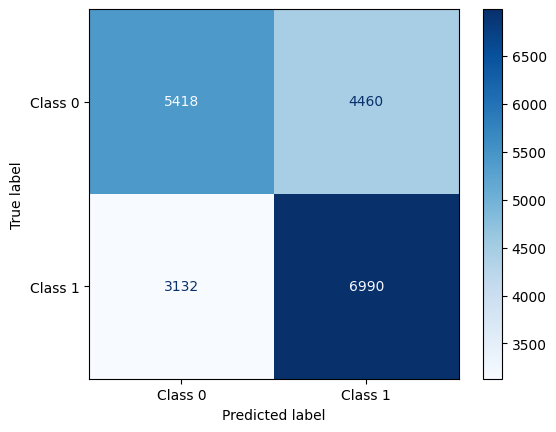

In [110]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
con_matrix = confusion_matrix(y_test,y_pred)

cm = ConfusionMatrixDisplay(con_matrix, display_labels = ["Class 0", "Class 1"])
cm.plot(cmap="Blues")
plt.show()

# Feature Selection

In [106]:
from sklearn.feature_selection import RFE

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)


rfe = RFE(rf, n_features_to_select=40, step=5)  


rfe.fit(X_train, y_train)


selected_features = X_train.columns[rfe.support_]
print("Selected Features:", list(selected_features))

Selected Features: ['EngineVersion', 'AppVersion', 'SignatureVersion', 'OSBuildLab', 'MDC2FormFactor', 'PrimaryDiskType', 'ChassisType', 'NumericOSVersion', 'OSBranch', 'OSEdition', 'OSInstallType', 'AutoUpdateOptionsName', 'LicenseActivationChannel', 'DateAS', 'DateOS', 'AntivirusConfigID', 'NumAntivirusProductsInstalled', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID', 'IEVersionID', 'OEMNameID', 'OEMModelID', 'ProcessorCoreCount', 'ProcessorModelID', 'PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB', 'TotalPhysicalRAMMB', 'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal', 'PrimaryDisplayResolutionVertical', 'OSBuildRevisionOnly', 'OSInstallLanguageID', 'OSUILocaleID', 'FirmwareManufacturerID', 'FirmwareVersionID', 'IsSecureBootEnabled', 'IsGamer', 'RegionIdentifier']


In [107]:

X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)


rf.fit(X_train_rfe, y_train)


accuracy = rf.score(X_test_rfe, y_test)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.6166


Accuracy is reduced to 0.6166 from 0.6204

# XGBOOST

In [59]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}


xgb_grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [60]:
print("Best Parameters for XGBoost:", xgb_grid_search.best_params_)
print("Best Estimator for XGBoost:", xgb_grid_search.best_estimator_)


best_xgb_model = xgb_grid_search.best_estimator_


Best Parameters for XGBoost: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
Best Estimator for XGBoost: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)


In [61]:
best_xgb_model.score(X_test,y_test)

0.6283

In [62]:
y_pred_train=best_xgb_model.predict(X_test)

In [63]:
precision_score(y_test,y_pred)

0.6104803493449782

In [64]:
recall_score(y_test,y_pred)

0.6905749851807943

In [65]:
f1_score(y_test,y_pred)

0.6480623029853514

In [115]:
print(classification_report(y_test,y_pred_train))

              precision    recall  f1-score   support

           0       0.64      0.58      0.61      9878
           1       0.62      0.68      0.65     10122

    accuracy                           0.63     20000
   macro avg       0.63      0.63      0.63     20000
weighted avg       0.63      0.63      0.63     20000



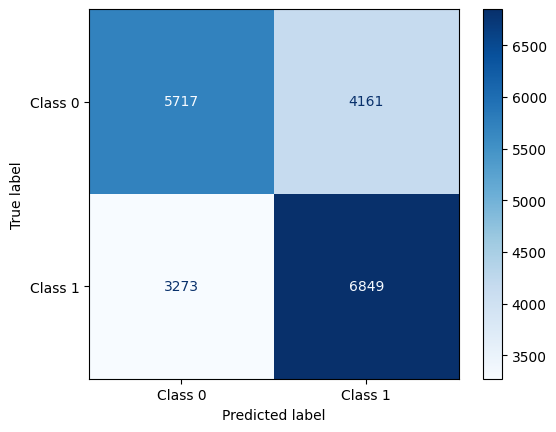

In [121]:

con_matrix = confusion_matrix(y_test,y_pred_train)

cm = ConfusionMatrixDisplay(con_matrix, display_labels = ["Class 0", "Class 1"])
cm.plot(cmap="Blues")
plt.show()

In [122]:
y_pred = best_xgb_model.predict(test_df)

In [123]:
y_pred1.shape

(10000,)

In [33]:
submission = pd.DataFrame({"id": range(0, test_df.shape[0]), "target": y_pred})

submission.to_csv('submission.csv', index = False)

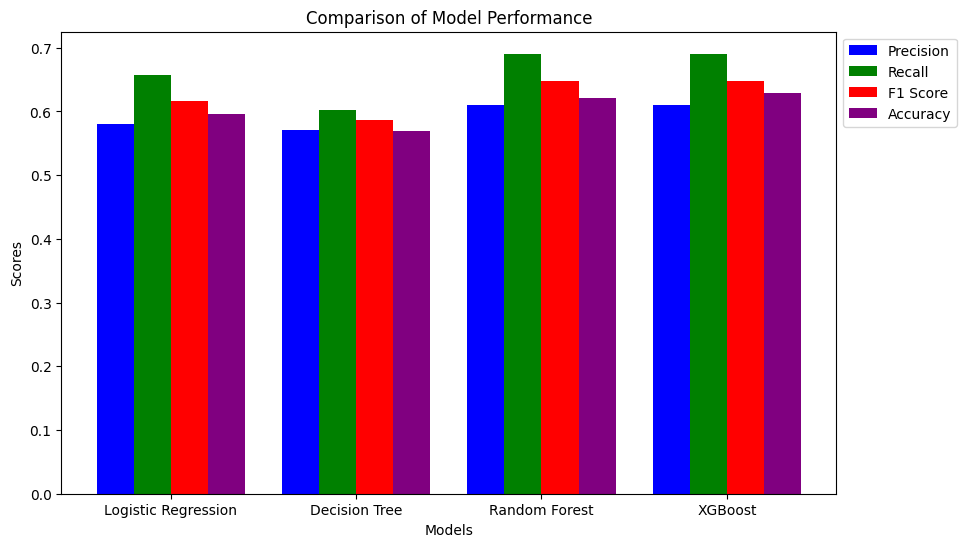

In [67]:
import numpy as np
import matplotlib.pyplot as plt


models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']


precision = [0.579667, 0.57113, 0.61048, 0.610480]
recall = [0.657379,0.60245 , 0.69057, 0.69057]
f1_score = [0.61608, 0.58637, 0.64806, 0.64806]
accuracy = [0.5962, 0.56985, 0.6204, 0.6283]


x = np.arange(len(models))  
width = 0.2  


fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - 1.5 * width, precision, width, label='Precision', color='blue')
ax.bar(x - 0.5 * width, recall, width, label='Recall', color='green')
ax.bar(x + 0.5 * width, f1_score, width, label='F1 Score', color='red')
ax.bar(x + 1.5 * width, accuracy, width, label='Accuracy', color='purple')


ax.set_xlabel("Models")
ax.set_ylabel("Scores")
ax.set_title("Comparison of Model Performance")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))


plt.show()
